In [ ]:
import os

# 1. Clone code từ GitHub
repo_url = "https://github.com/MrSalalad/Parallel-programming-final-project"

if not os.path.exists("cuda_project"):
    print(f"Cloning from {repo_url}...")
    !git clone $repo_url cuda_project
else:
    print("Repo đã tồn tại. Đang pull code mới nhất...")
    %cd cuda_project
    !git pull
    %cd ..

# 2. Di chuyển vào thư mục dự án
%cd cuda_project

# 3. Tải & Setup Dataset (Vì dataset nặng thường không up lên git)
# Code C++ của bạn đang trỏ tới "./data" nên ta cần tạo folder data và bỏ file bin vào đó
if not os.path.exists("data/data_batch_1.bin"):
    print("Downloading & Setting up Data...")
    !mkdir -p data
    !wget -q https://www.cs.toronto.edu/~kriz/cifar-10-binary.tar.gz -O cifar-10-binary.tar.gz
    !tar -xzf cifar-10-binary.tar.gz

    # Di chuyển file từ thư mục con ra ngoài (Flatten) để khớp với code "./data"
    !mv cifar-10-batches-bin/* data/
    !rm -rf cifar-10-batches-bin cifar-10-binary.tar.gz
    print("✅ Data setup complete!")
else:
    print("✅ Data ready.")

# Kiểm tra file
!ls -R

Cloning from https://github.com/MrSalalad/Parallel-programming-final-project...
Cloning into 'cuda_project'...
remote: Enumerating objects: 105, done.
remote: Counting objects: 100% (78/78), done.
remote: Compressing objects: 100% (60/60), done.
remote: Total 105 (delta 38), reused 50 (delta 17), pack-reused 27 (from 1)
Receiving objects: 100% (105/105), 169.74 MiB | 21.67 MiB/s, done.
Resolving deltas: 100% (39/39), done.
Updating files: 100% (28/28), done.
/content/cuda_project
✅ Data ready.
.:
build_gpu.bat  data	main.cpp     main_gpu_version1.cu  output	 src
build_run.bat  include	main_gpu.cu  Makefile		   Phase2.ipynb

./data:
data_batch_1.bin  data_batch_3.bin  data_batch_5.bin
data_batch_2.bin  data_batch_4.bin  test_batch.bin

./include:
autoencoder.h	   gpu_autoencoder.h  layers.h
cifar10_dataset.h  kernels.cuh	      utils.h

./output:
model_cpu.bin  model_gpu_phase2.bin

./src:
autoencoder.cpp  cifar10_dataset.cpp  gpu  layers.cpp  utils.cpp

./src/gpu:
gpu_autoencoder.cu  ke

In [ ]:
!nvcc -arch=sm_75 -o extract_features \
    src/extract_features.cu \
    src/cifar10_dataset.cpp \
    src/layers.cpp \
    src/autoencoder.cpp \
    src/gpu/gpu_autoencoder.cu \
    src/gpu/kernels_naive.cu \
    src/gpu/kernels_phase3.cu \
    -I./include \
    -O3 -std=c++14

src/gpu/gpu_autoencoder.cu(431): warning #177-D: variable "size_up2" was declared but never referenced
      int size_up2 = batch_size * 256 * 32 * 32;
          ^

Remark: The warnings can be suppressed with "-diag-suppress <warning-number>"



In [ ]:
!mkdir -p output
!./extract_features

   PHASE 4 PREP: FEATURE EXTRACTION (DEBUG)       
[DATA] Loading Training Set...
Loading training data...
Initialized 50000 indices for shuffling.
Allocating GPU Memory (Batch Size: 100)...
GPU Memory Allocated Successfully.
Initializing Autoencoder Weights...
[LOAD] Loading weights from output/model_gpu_phase3_ver1.bin...
   [DEBUG] Weight Layer 1 (CPU) -> Sum(first 1k): 40.9004 | Max: 0.184773
[LOAD] Weights loaded successfully.
--> Extracting train set (50000 images)...
   [DEBUG] Extracted Features (Batch 0) -> Sum(first 1k): 105.513 | Max: 0.886154
    Processed 10000/50000
    Processed 20000/50000
    Processed 30000/50000
    Processed 40000/50000
    Processed 50000/50000
[DONE] Saved to output/train_features.bin
--> Extracting test set (10000 images)...
   [DEBUG] Extracted Features (Batch 0) -> Sum(first 1k): 103.536 | Max: 0.801134
    Processed 10000/10000
[DONE] Saved to output/test_features.bin


In [ ]:
!pip install cudf-cu12 cuml-cu12 --extra-index-url=https://pypi.nvidia.com

Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 MB 224.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.6/89.6 MB 96.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.2/581.2 MB 91.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.9/200.9 MB 127.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.3/68.3 MB 122.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 338.1/338.1 MB 70.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 366.5/366.5 MB 66.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-cusparse-cu12
    Found existing installation: nvidia-cusparse-cu12 12.5.4.2
    Uninstalling nvidia-cusparse-cu12-12.5.4.2:
      Successfully uninstalled nvidia-cusparse-cu12-12.5.4.2
  Attempting uninstall: nvidia-curand-cu12
    Found existing installation: nvidia-curand-cu12 10.3.7.77
    Uninstalling nvidia-curand-cu12-10.3.7

In [ ]:
!pip install tensorflow

  PHASE 4: SVM TRAINING (MEMORY SAFE MODE)        
  Config: Kernel=RBF, C=10, gamma=auto            
[LOAD] Reading 20000 samples from /content/cuda_project/output/train_features.bin...
[RAM] Training data loaded. Shape: (20000, 8192)
[PREP] Scaling Training Data...
[RAM] Data scaled. Garbage collecting...

[TRAIN] Training SVM (Samples: 20000, C=10, gamma=auto)...
✅ Training finished in 24.61 s
[RAM] Freed training data.
[SAVE] Saving model...

[EVAL] Loading Test Data...
[LOAD] Reading 10000 samples from /content/cuda_project/output/test_features.bin...
[PREP] Scaling Test Data...
[PREDICT] Predicting...

🎯 FINAL ACCURACY (Safe Mode): 61.62%
              precision    recall  f1-score   support

       Plane     0.6936    0.6610    0.6769      1000
         Car     0.6252    0.7690    0.6897      1000
        Bird     0.5269    0.4700    0.4968      1000
         Cat     0.4280    0.4610    0.4439      1000
        Deer     0.5748    0.5300    0.5515      1000
         Dog     0.543

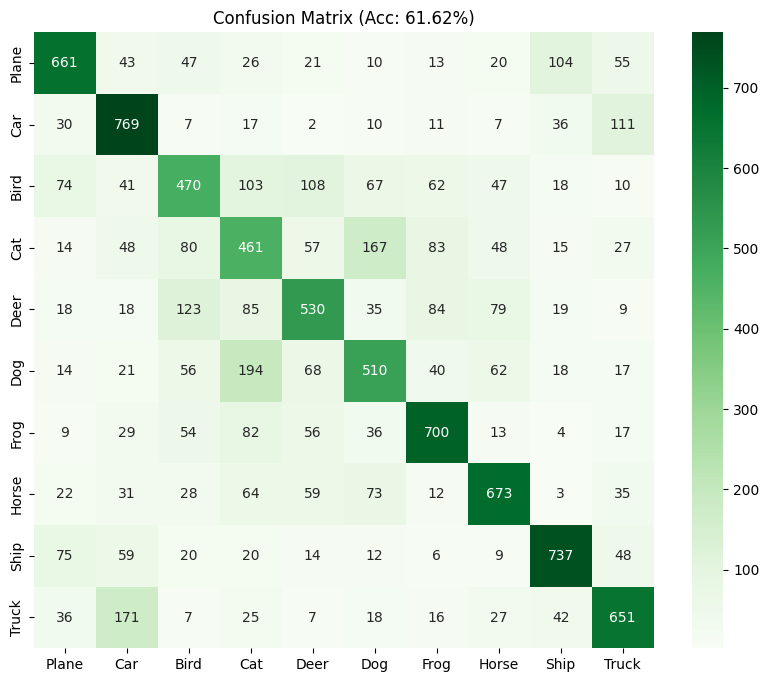

In [ ]:
import numpy as np
import os
import time
import gc # Garbage Collector để dọn RAM
import pickle
from cuml.svm import SVC
from cuml.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print("==================================================")
print("  PHASE 4: SVM TRAINING (MEMORY SAFE MODE)        ")
print("  Config: Kernel=RBF, C=10, gamma=auto            ")
print("==================================================")

# --- CẤU HÌNH GIẢM TẢI ---
FEATURE_DIM = 8192
NUM_TRAIN   = 20000  # Giảm xuống 20k để tránh sập RAM
NUM_TEST    = 10000  # Giữ nguyên Test set
CIFAR_CLASSES = ['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

def load_features_only(prefix, num_samples):
    path = f'/content/cuda_project/output/{prefix}_features.bin'
    print(f"[LOAD] Reading {num_samples} samples from {path}...")
    if not os.path.exists(path):
        print(f"❌ File not found: {path}")
        return None
    # Load và reshape ngay lập tức để tiết kiệm nhớ
    try:
        data = np.fromfile(path, dtype=np.float32)
        # Nếu file chứa nhiều hơn số cần lấy, cắt bớt
        expected_len = num_samples * FEATURE_DIM
        if data.size > expected_len:
            data = data[:expected_len]
        return data.reshape(num_samples, FEATURE_DIM)
    except Exception as e:
        print(f"❌ Error loading: {e}")
        return None

def load_labels_only(prefix, num_samples):
    path = f'/content/cuda_project/output/{prefix}_labels.bin'
    try:
        data = np.fromfile(path, dtype=np.uint8)
        if data.size > num_samples:
            data = data[:num_samples]
        return data
    except Exception as e:
        print(f"❌ Error loading labels: {e}")
        return None

# --- 1. LOAD & SCALE TRAINING DATA ---
X_train = load_features_only("train", NUM_TRAIN)
y_train = load_labels_only("train", NUM_TRAIN)

if X_train is not None:
    print(f"[RAM] Training data loaded. Shape: {X_train.shape}")

    print("[PREP] Scaling Training Data...")
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train) # Ghi đè lên biến cũ để tiết kiệm RAM
    print("[RAM] Data scaled. Garbage collecting...")
    gc.collect() # Dọn dẹp RAM ngay

    # --- 2. TRAIN SVM ---
    print(f"\n[TRAIN] Training SVM (Samples: {NUM_TRAIN}, C=10, gamma=auto)...")
    svm_params = {
        'kernel': 'rbf',
        'C': 10.0,
        'gamma': 'auto',
        'cache_size': 2000 # Giới hạn cache GPU
    }
    model = SVC(**svm_params)

    t0 = time.time()
    model.fit(X_train, y_train)
    print(f"✅ Training finished in {time.time() - t0:.2f} s")

    # Xóa X_train để lấy chỗ cho X_test
    del X_train
    del y_train
    gc.collect()
    print("[RAM] Freed training data.")

    # --- 3. SAVE MODEL ---
    print("[SAVE] Saving model...")
    with open('/content/cuda_project/output/svm_model_safe.pkl', 'wb') as f:
        pickle.dump(model, f)

    # --- 4. LOAD & SCALE TEST DATA ---
    print("\n[EVAL] Loading Test Data...")
    X_test = load_features_only("test", NUM_TEST)
    y_test = load_labels_only("test", NUM_TEST)

    if X_test is not None:
        print("[PREP] Scaling Test Data...")
        X_test = scaler.transform(X_test) # Dùng scaler đã fit ở trên

        print("[PREDICT] Predicting...")
        y_pred = model.predict(X_test)
        if hasattr(y_pred, 'to_numpy'): y_pred = y_pred.to_numpy()

        # --- 5. REPORT ---
        acc = accuracy_score(y_test, y_pred)
        print("\n" + "="*40)
        print(f"🎯 FINAL ACCURACY (Safe Mode): {acc * 100:.2f}%")
        print("="*40)

        print(classification_report(y_test, y_pred, target_names=CIFAR_CLASSES, digits=4))

        # Matrix
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(10, 8))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
                    xticklabels=CIFAR_CLASSES, yticklabels=CIFAR_CLASSES)
        plt.title(f'Confusion Matrix (Acc: {acc*100:.2f}%)')
        plt.show()
    else:
        print("❌ Error loading test data")
else:
    print("❌ Error loading train data")